In [42]:
from os import path
import pandas as pd

import import_ipynb
from ReadGitTimestamps import history_df



from matplotlib import pyplot as plt

# print(_df)
# print(history_df())


# _df = _df["nb_commits"]
# print(type(_df.index[0]))


def get_df1():
    datafile = path.join("../data", "bht2.gitactivity")
    _df = pd.read_csv(datafile, parse_dates=True, sep=";", index_col="date")
    _df.rename(columns=lambda x: x.strip(), inplace=True)
    return _df

def get_df2():
    _df=history_df()
    _df.index = _df.day
    _df.rename(columns={"nb_commits": "commits"}, inplace=True)
    _df.drop(columns=["date", "hour", "day"], inplace=True)
    # _df = _df["commits"]o
    _df.index = pd.to_datetime(_df.index)
    return _df

_df = get_df2()

print(_df)

# groupby_key = "date"
groupby_key = "day"

_df_agg = _df.groupby(groupby_key).agg("sum")

_df_agg.sort_values(groupby_key, inplace=True)


start_date = _df_agg.index[0]
end_date = _df_agg.index[-1]

new_index = pd.date_range(start=start_date, end=end_date, freq="d")

_df_reindexed = _df_agg.reindex(new_index)

# _df_cutted = _df_reindexed.truncate(before="2023-09-01")
_df_cutted = _df_reindexed.copy()




            commits
day                
2024-03-28        1
2024-03-28        1
2024-03-28        1
2024-03-28        1
2024-03-28        1
...             ...
2022-07-18        1
2022-07-18        1
2022-07-18        1
2022-07-18        1
2022-07-18        1

[684 rows x 1 columns]


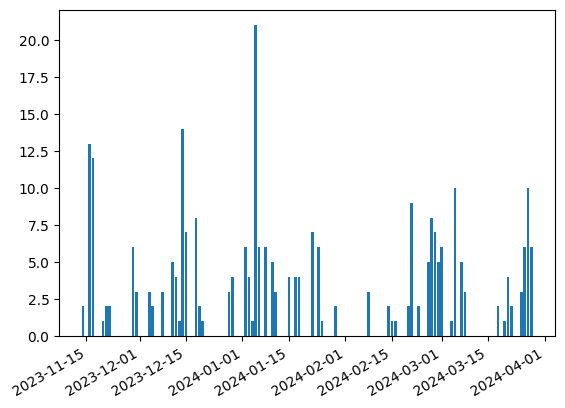

In [41]:
fig, ax = plt.subplots()
# _data_frame = _df_reindexed
_data_frame = _df_cutted
ax.bar(_data_frame.index, _data_frame.commits)
fig.autofmt_xdate()
# plt.xticks(rotation = 45)
plt.show()